In [1]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [2]:
df= pd.read_pickle('../datos/01-df_registrados.pickle')

In [6]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,1518


In [8]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
weathersit          category
atemp                float64
hum                  float64
windspeed            float64
registered             int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [3]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['registered'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,registered
0,invierno,408957
1,otoño,711831
2,primavera,715067
3,verano,835038


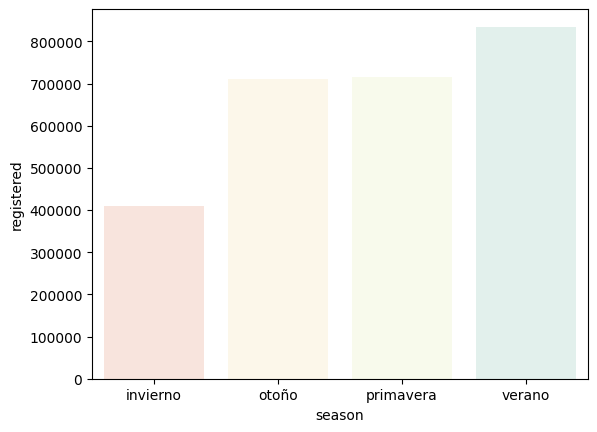

In [9]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [10]:
mapa_season = {'invierno':0, 'primavera':1, 'otoño':2, 'verano':3} 

In [11]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [15]:
holiday = df.groupby('holiday')['registered'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,registered
0,festivo,53777
1,no festivo,2617116


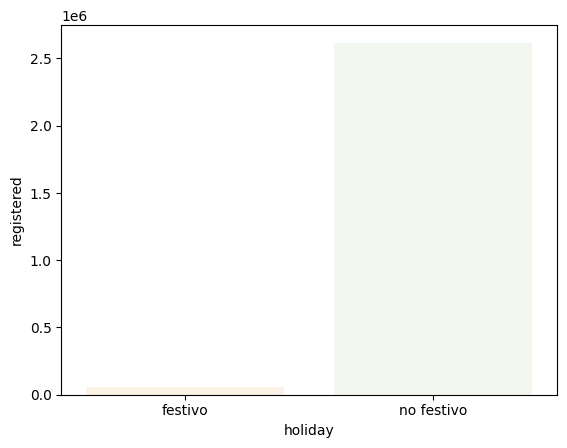

In [16]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [17]:
mapa_holiday = {'festivo':0, 'no festivo':1} 

In [18]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [20]:
df.sample(7)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
266,2018-09-24,2,0,9,1,1,2,28.22060,86.2500,5.251681,3647
98,2018-04-09,1,0,4,1,1,2,17.07645,87.7500,8.916561,1576
595,2019-08-19,3,1,8,1,1,2,30.17770,71.1667,5.792150,3341
198,2018-07-18,3,0,7,1,3,1,35.19625,65.1250,14.458868,3617
314,2018-11-11,2,0,11,0,7,1,15.34085,44.6250,21.083225,2928
152,2018-06-02,1,0,6,1,6,1,32.19710,30.5000,19.583229,4232
211,2018-07-31,3,0,7,1,2,1,36.48980,48.0833,11.042471,2778


---

## WEEKDAY

In [21]:
semana = df.groupby('weekday')['registered'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,registered
0,1,306090
1,2,348041
2,3,396847
3,4,427173
4,5,418467
5,6,410222
6,7,364053


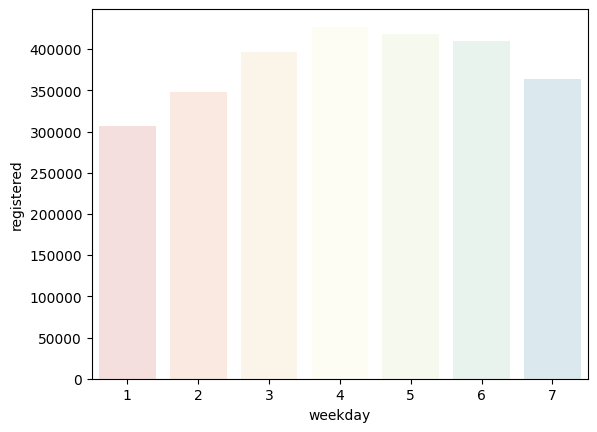

In [22]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [23]:
mapa_weekday = {7:0, 
1:0,
2:1, 
3:2,
4:3, 
5:3,
6:3}

In [24]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [30]:
clima = df.groupby('weathersit')['registered'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,registered
0,1,1811606
1,2,825313
2,3,33974


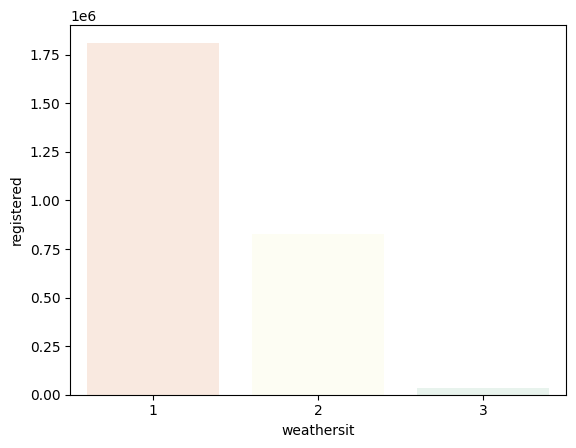

In [31]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [32]:
mapa_weather = {3: 0, 2:1, 1:2}

In [33]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [34]:
df.sample(12)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
134,2018-05-15,1,0,5,1,1,1,26.80000,86.7083,10.249593,2971
499,2019-05-15,1,1,5,1,2,1,28.82020,79.4583,9.875264,4490
541,2019-06-26,3,1,6,1,2,2,29.73520,37.3333,23.292014,6365
529,2019-06-14,1,1,6,1,3,2,31.21915,56.9583,17.000111,6183
164,2018-06-14,1,0,6,1,3,2,29.57730,50.7083,18.041961,4164
535,2019-06-20,1,1,6,1,3,2,36.04875,59.2083,7.625404,5339
284,2018-10-12,2,0,10,1,3,0,25.88585,90.6250,16.626050,2199
603,2019-08-27,3,1,8,1,1,2,32.73440,73.0417,8.625111,5928
312,2018-11-09,2,0,11,1,3,2,20.45395,75.8333,4.167119,3804
291,2018-10-19,2,0,10,1,3,0,25.69240,89.5217,16.303713,2170


### `Que hacemos con columna mnth y yr?`

In [35]:
df.to_pickle('../datos/02-df_r_encoding.pk')